In [80]:
import numpy as np
import pandas as pd

In [81]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [82]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [83]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [84]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

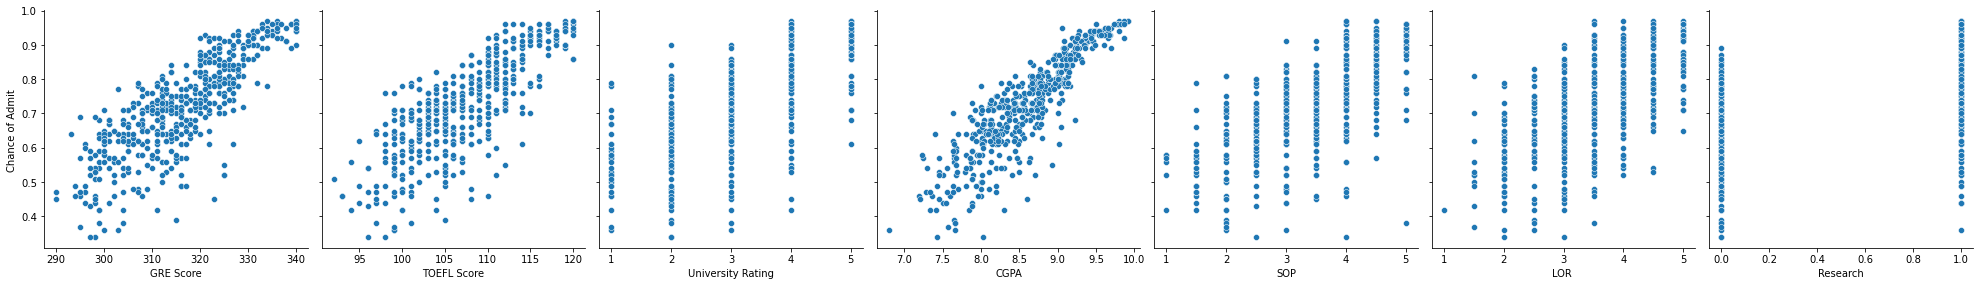

In [86]:
sns.pairplot(data, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'SOP', 'LOR ', 'Research'], y_vars=['Chance of Admit '],height=4, aspect=1, kind='scatter', diag_kind = None)

<AxesSubplot:>

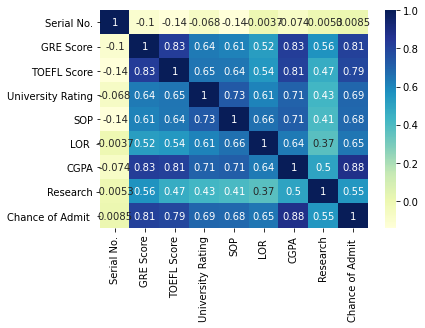

In [87]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)


In [88]:
X = data.drop(columns = ['Chance of Admit '])
y = data['Chance of Admit ']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [98]:
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)

BayesianRidge()

In [99]:
print(lm.intercept_)
print(lm.coef_)

-1.2940939871441222
[0.00011854 0.00131364 0.0042756  0.00530361 0.00640514 0.0136121
 0.11778752 0.02341535]


In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [101]:
y_train_pred = lm.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

In [102]:
y_test_pred = lm.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

In [96]:

def ridge_aplha_opt(X_train, y_train, X_test, y_test):
    max_r2 = 0
    for count in range(1,10,1):
        alpha = count/10
        lm = Lasso(alpha=alpha)
        lm.fit(X_train, y_train)
        y_test_pred = lm.predict(X_test)
        r2_test = r2_score(y_test, y_test_pred)
        # print(alpha, "  ", r2_test)
        if (r2_test >= max_r2):
            max_r2 = r2_test
            max_r2_alpha = alpha
    print("Max R2 = ", max_r2)
    print ("Alpha = ", max_r2_alpha)

ridge_aplha_opt(X_train, y_train, X_test, y_test)

Max R2 =  0.7253796108535338
Alpha =  0.1
